<a href="https://colab.research.google.com/github/HwangHanJae/Dacon_tutorial/blob/main/Dacon_moives_boxnum_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#한글화

In [1]:
#나눔 고딕 폰트 인스톨
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 라이브러리 로드

In [233]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re

from IPython.display import set_matplotlib_formats

warnings.filterwarnings(action='ignore')
plt.style.use('seaborn')
set_matplotlib_formats('svg')

In [234]:
#맷플롯립 폰트 관련 매니저
import matplotlib.font_manager as fm
# 맷플롯라이브러리에 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
fm._rebuild()
# 진행후에 런타임 다시시작
print("현재 설정 폰트",plt.rcParams['font.family'])

현재 설정 폰트 ['NanumBarunGothic']


# 데이터 불러오기

In [235]:
path  = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/movies/"
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")

In [236]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [237]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [238]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [239]:
train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [240]:
test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [241]:
train.sample(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
523,옥희의 영화,스폰지,드라마,2010-09-16,80,청소년 관람불가,홍상수,NaN,0,57,3,37122
309,레바논 감정,어뮤즈,공포,2014-02-27,106,청소년 관람불가,정영헌,2.972299e+06,1,10,3,1523
404,태어나서 미안해,CJ 엔터테인먼트,드라마,2012-03-08,80,15세 관람가,최영석,NaN,0,51,3,201
236,꿍따리 유랑단,(주)키노아이,다큐멘터리,2011-12-01,72,전체 관람가,김영진,NaN,0,3,7,179
428,한민족 그리고 조선족,한국YWCA연합회,다큐멘터리,2014-12-10,61,전체 관람가,전화성,3.453333e+02,3,2,6,71


In [242]:
train['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
영화사 廊             1
이상우필름             1
(주)두타연            1
새인컴퍼니             1
(주)에이원 엔터테인먼트     1
Name: distributor, Length: 169, dtype: int64

In [243]:
train['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [244]:
train['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

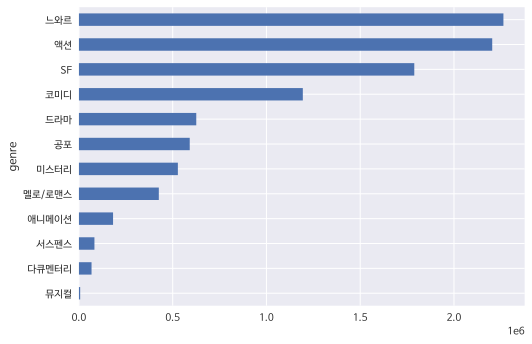

In [245]:
#장르별 박스 오피스 넘버
train.groupby("genre")['box_off_num'].mean().sort_values().plot.barh()

In [246]:
train.groupby("genre")['box_off_num'].mean().sort_values(ascending=False).index

Index(['느와르', '액션', 'SF', '코미디', '드라마', '공포', '미스터리', '멜로/로맨스', '애니메이션',
       '서스펜스', '다큐멘터리', '뮤지컬'],
      dtype='object', name='genre')

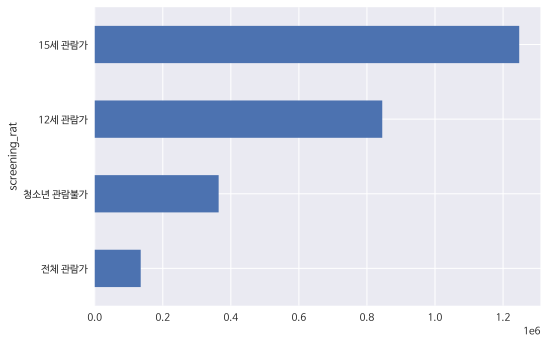

In [247]:
#관람 나이별 박스 오피스 넘버
train.groupby('screening_rat')['box_off_num'].mean().sort_values().plot.barh()

In [248]:
train.groupby("screening_rat")['box_off_num'].mean().sort_values(ascending=False).index

Index(['15세 관람가', '12세 관람가', '청소년 관람불가', '전체 관람가'], dtype='object', name='screening_rat')

In [249]:
#스태프별 주연비율
train['actor_rat'] = np.round(train['num_actor'] / train["num_staff"] *100, 2)
test['actor_rat'] = np.round(test['num_actor'] / test["num_staff"]*100,2)

train.loc[train['actor_rat'].isnull(), 'actor_rat'] = 0

# 데이터 전처리

In [250]:
train.loc[(train['dir_prev_bfnum'].isnull()) & (train['dir_prev_num'] == 0), "dir_prev_bfnum"] = 0
test.loc[(test['dir_prev_bfnum'].isnull()) & (test['dir_prev_num'] == 0), "dir_prev_bfnum"] = 0

In [251]:
train.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
actor_rat         0
dtype: int64

In [252]:
test.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
actor_rat         0
dtype: int64

In [253]:
train['distributor'].unique()

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

In [254]:
train['distributor'].nunique()

169

In [255]:
#(주) 제거
train['distributor'] = train['distributor'].str.replace('\\(',"").str.replace('주',"").str.replace("\\)","")
test['distributor'] = test['distributor'].str.replace('\\(',"").str.replace('주',"").str.replace("\\)","")
#공백 제거
train['distributor'] = train['distributor'].str.replace(" ","")
test['distributor'] = test['distributor'].str.replace(" ","")

In [256]:
train['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in train['distributor']]
test['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in test['distributor']]

In [257]:
# distributor 중복제거 함수
def get_dis(x) :
    if 'CJ' in x or 'CGV' in x :
        return 'CJ'
    elif '쇼박스' in x :
        return '쇼박스'
    elif 'SK' in x :
        return 'SK'
    elif '리틀빅픽' in x :
        return '리틀빅픽처스'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x :
        return '싸이더스'
    elif '에이원' in x :
        return '에이원'
    elif '마인스' in x :
        return '마인스'
    elif '마운틴픽' in x :
        return '마운틴픽처스'
    elif '디씨드' in x :
        return '디씨드'
    elif '드림팩트' in x :
        return '드림팩트'
    elif '메가박스' in x :
        return '메가박스'
    elif '마운틴' in x :
        return '마운틴'
    else :
        return x

In [258]:
# distributor 중복제거
train['distributor'] = train['distributor'].apply(get_dis)
test['distributor'] = test['distributor'].apply(get_dis)

In [259]:
train['distributor'].nunique()

147

In [260]:
train['distributor'].unique()

array(['롯데엔터테인먼트', '쇼박스', 'NEW', '백두대간', '유니버설픽쳐스인터내셔널코리아', '두타연',
       '케이알씨지', '콘텐츠윙', '키노아이', '팝파트너스', 'CJ', '영화제작전원사', '리틀빅픽처스', '스폰지',
       '조이앤시네마', '인디플러그', '콘텐츠판다', '인디스토리', '팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사진진', '레인보우팩토리', '김기덕필름', '동국대학교충무로영상제작센터', 'BoXoo엔터테인먼트',
       '마운틴픽처스', '메가박스', '골든타이드픽처스', '파이오니아21', '디씨드', '드림팩트', '시너지',
       '디마엔터테인먼트', '판다미디어', '스톰픽쳐스코리아', '예지림엔터테인먼트', '영화사조제', '보람엔터테인먼트',
       '시네마달', '노바엔터테인먼트', '패스파인더씨앤씨', '대명문화공장', '온비즈넷', 'KTG상상마당',
       '무비꼴라쥬', '인벤트디', '씨네그루키다리이엔티', '스튜디오후크', '나이너스엔터테인먼트', 'THE픽쳐스',
       '영구아트무비', '어뮤즈', '이모션픽처스', '이스트스카이필름', '필라멘트픽쳐스', '조이앤컨텐츠그룹',
       '타임스토리그룹', '휘엔터테인먼트', '이십세기폭스코리아', '피터팬픽쳐스', '에스와이코마드', '더픽쳐스',
       '오퍼스픽쳐스', '고앤고필름', '사람과사람들', 'JK필름', '씨너스엔터테인먼트', 'KT', '싸이더스',
       '프레인글로벌', '나우콘텐츠', '홀리가든', '브릿지웍스', '엣나인필름', '위더스필름', '에이원',
       'OAL올', '전망좋은영화사', '스토리셋', '이상우필름', '씨네굿필름', '영희야놀자', '찬란', '어썸피플',
       '아방가르드필름', '스크린조이', '와이드릴리즈', 'tvN', '액티버스엔터테인먼트', '제나두엔터테인먼트',
       

In [261]:
#배급사별 영화 관객수 평균 값으로 인코딩
train_dis_rank = train.groupby(['distributor'])['box_off_num'].mean().reset_index(name='distributor_rank').sort_values(by='distributor_rank')
train_dis_rank

,distributor,distributor_rank
110,인피니티엔터테인먼트,2.000000e+00
15,고구마공작소,8.000000e+00
52,사람과사람들,4.200000e+01
97,위드시네마,4.600000e+01
19,나우콘텐츠,5.400000e+01
...,...,...
7,NEW,1.939060e+06
1,CJ,2.066506e+06
84,영구아트무비,2.541603e+06
75,아이필름코퍼레이션,3.117859e+06


In [262]:
train_dis_rank['distributor_rank'] = [i + 1 for i in range(train_dis_rank.shape[0])]
train_dis_rank

,distributor,distributor_rank
110,인피니티엔터테인먼트,1
15,고구마공작소,2
52,사람과사람들,3
97,위드시네마,4
19,나우콘텐츠,5
...,...,...
7,NEW,143
1,CJ,144
84,영구아트무비,145
75,아이필름코퍼레이션,146


In [264]:
# 데이터 병합
# print(*train_dis_rank.iloc[:1, :]['distributor'].values)
# print(*train_dis_rank.iloc[:1, :]['distributor_rank'].values)
# *train_dis_rank.iloc[:i+1, :]['distributor'].values
# *train_dis_rank.iloc[:i+1, :]['distributor_rank'].values


distributor = []
for i in range(len(train_dis_rank)):
  distributor.append(str(*train_dis_rank.iloc[i:i+1, :]['distributor'].values))

In [276]:
train['distributor_rank'] = np.nan
test['distributor_rank'] = np.nan
for i, name in enumerate(distributor, 1):
  train.loc[train['distributor'] == name, "distributor_rank"] = i
  test.loc[test['distributor'] == name, "distributor_rank"] = i

In [280]:
test.loc[test['distributor_rank'].isnull(), "distributor_rank"] = 0

In [281]:
#year
train['year'] = train['release_time'].astype(np.datetime64).dt.year
test['year'] = test['release_time'].astype(np.datetime64).dt.year
#month
train['month'] = train['release_time'].astype(np.datetime64).dt.month
test['month'] = test['release_time'].astype(np.datetime64).dt.month

In [282]:
#drop
drop_columns = ['title', 'release_time',"director","distributor"]
train = train.drop(drop_columns, axis=1)
test = test.drop(drop_columns, axis=1)

In [283]:
train.head()

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,actor_rat,distributor_rank,year,month
0,액션,96,청소년 관람불가,0.00,0,91,2,23398,2.20,141.0,2012,11
1,느와르,130,청소년 관람불가,1161602.50,2,387,3,7072501,0.78,147.0,2015,11
2,액션,123,15세 관람가,220775.25,4,343,4,6959083,1.17,147.0,2013,6
3,코미디,101,전체 관람가,23894.00,2,20,6,217866,30.00,143.0,2012,7
4,코미디,108,15세 관람가,1.00,1,251,2,483387,0.80,147.0,2010,11


In [284]:
test.head()

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,actor_rat,distributor_rank,year,month
0,느와르,125,청소년 관람불가,3.005290e+05,2,304,3,0.99,138.0,2010,1
1,멜로/로맨스,113,12세 관람가,3.427002e+05,4,275,3,1.09,147.0,2010,1
2,드라마,115,12세 관람가,4.206611e+06,3,419,7,1.67,144.0,2010,1
3,액션,116,15세 관람가,6.913420e+05,2,408,2,0.49,147.0,2010,2
4,공포,110,15세 관람가,3.173800e+04,1,380,1,0.26,144.0,2010,2


In [285]:
#rank순으로 인코딩
dfs = [train, test]
genre_rank = train.groupby("genre")['box_off_num'].mean().sort_values().index

for i, genre in enumerate(genre_rank,1):
  for df in dfs:
    df.loc[df['genre'] == genre,"genre"] = i

for df in dfs :
  df['genre'] = df['genre'].astype(np.int64)

In [286]:
dfs = [train, test]
screening_rat_rank = train.groupby("screening_rat")['box_off_num'].mean().sort_values().index

for i, screening_rat in enumerate(screening_rat_rank,1):
  for df in dfs:
    df.loc[df['screening_rat'] == screening_rat,"screening_rat"] = i

for df in dfs :
  df['screening_rat'] = df['screening_rat'].astype(np.int64)

In [287]:
# #label encoding
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()

# encoding_columns = ["genre","screening_rat"]
# for column in encoding_columns:
#   train[column] = label_encoder.fit_transform(train[column])
#   test[column] = label_encoder.transform(test[column])

In [288]:
train.head()

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,actor_rat,distributor_rank,year,month
0,11,96,2,0.00,0,91,2,23398,2.20,141.0,2012,11
1,12,130,2,1161602.50,2,387,3,7072501,0.78,147.0,2015,11
2,11,123,4,220775.25,4,343,4,6959083,1.17,147.0,2013,6
3,9,101,1,23894.00,2,20,6,217866,30.00,143.0,2012,7
4,9,108,4,1.00,1,251,2,483387,0.80,147.0,2010,11


In [289]:
test.head()

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,actor_rat,distributor_rank,year,month
0,12,125,2,3.005290e+05,2,304,3,0.99,138.0,2010,1
1,5,113,3,3.427002e+05,4,275,3,1.09,147.0,2010,1
2,8,115,3,4.206611e+06,3,419,7,1.67,144.0,2010,1
3,11,116,4,6.913420e+05,2,408,2,0.49,147.0,2010,2
4,7,110,4,3.173800e+04,1,380,1,0.26,144.0,2010,2


In [290]:
# dfs = [train, test]
# for df in dfs: 
#   df['dir_prev_bfnum'] = np.round(df['dir_prev_bfnum'])
#   df['dir_prev_bfnum'] = np.round(df['dir_prev_bfnum'])

#모델

In [291]:
!pip install catboost

In [292]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [293]:
def rmse(y_true, y_pred):
  result = np.sqrt(mse(y_true, y_pred))
  return result

In [294]:
column = ['genre', 'time', 'screening_rat', 'dir_prev_bfnum', 'dir_prev_num','num_staff', 'num_actor', 'year', 'month', 'distributor_rank']
target = ['box_off_num']
X = train[column]
y = train[target]

X_test = test[column]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print("X_train : {} y_train : {}".format(X_train.shape, y_train.shape))
print("X_val : {} y_val : {}".format(X_val.shape, y_val.shape))
print("X_test : {}".format(X_test.shape))

X_train : (480, 10) y_train : (480, 1)
X_val : (120, 10) y_val : (120, 1)
X_test : (243, 10)


In [295]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer

In [296]:
models = [RandomForestRegressor(criterion='mse'), XGBRegressor(criterion='mse'), LGBMRegressor(objective='mse'), CatBoostRegressor(verbose=200)]

for model in models:
  print(model.__class__.__name__)
  model.fit(X_train, y_train)
  model_pred = model.predict(X_val)
  print("rmse" ,rmse(y_val, model_pred))

RandomForestRegressor
rmse 1289786.4092051568
XGBRegressor
[09:21:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse 1269934.3310263332
LGBMRegressor
rmse 1505621.355428555
CatBoostRegressor
Learning rate set to 0.03425
0:	learn: 1902748.4414545	total: 1.5ms	remaining: 1.5s
200:	learn: 689313.5814189	total: 232ms	remaining: 921ms
400:	learn: 405249.6546200	total: 472ms	remaining: 705ms
600:	learn: 252204.4912985	total: 710ms	remaining: 472ms
800:	learn: 160320.8039358	total: 936ms	remaining: 233ms
999:	learn: 106426.9998846	total: 1.16s	remaining: 0us
rmse 1383333.7216402723


In [38]:
#교차검증
model =  RandomForestRegressor(criterion='mse',n_estimators=1000)
preds = []
models = []
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in k_fold.split(X,y):
  X_t = X.iloc[train_index]
  y_t = y.iloc[train_index]
  X_val = X.iloc[val_index]
  y_val = y.iloc[val_index]
  
  models.append(model.fit(X_t, y_t))

for model in models:
  preds.append(model.predict(X_test))
print(len(preds))

5


In [ ]:
#교차검증
model =  XGBRegressor(criterion='mse', n_estimators=1000)
preds = []
models = []
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in k_fold.split(X,y):
  X_t = X.iloc[train_index]
  y_t = y.iloc[train_index]
  X_val = X.iloc[val_index]
  y_val = y.iloc[val_index]
  
  models.append(model.fit(X_t, y_t, eval_set= [(X_val, y_val)], early_stopping_rounds=100, verbose=100))

for model in models:
  preds.append(model.predict(X_test))
print(len(preds))

[09:28:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.38616e+06
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:1.40342e+06
Stopping. Best iteration:
[8]	validation_0-rmse:1.13037e+06

[09:28:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.39131e+06
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:1.27418e+06
Stopping. Best iteration:
[16]	validation_0-rmse:1.07837e+06

[09:28:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.03435e+06
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:1.57198e+06
Stopping. Best iteration:
[55]	validation_0-rmse:1.54958e+06

[09:28:50] WARNING: /works

In [299]:
from sklearn.model_selection import GridSearchCV
clf  = XGBRegressor(criterion='mse')
params = {
    "learning_rate " : [0.1,0.01,0.05,0.0001],
    "n_estimators " : [1000,2000],
    "max_depth" : [4,5,6,7],

}
xgb_grid_clf = GridSearchCV(estimator=clf, param_grid= params, n_jobs=-1, cv=5, scoring=make_scorer(rmse, greater_is_better=False))
xgb_grid_clf.fit(X,y)
print(xgb_grid_clf.best_score_)

[09:24:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-1458786.0066257608


In [300]:
from sklearn.model_selection import GridSearchCV
clf  = RandomForestRegressor(criterion='mse',)
params = {
    "n_estimators" : [100,500,1000,1500],
    "random_state" : [42],
    "max_depth" : [4,5,6,7],
}
rf_grid_clf = GridSearchCV(estimator=clf, param_grid= params, n_jobs=-1, cv=k_fold, scoring=make_scorer(rmse, greater_is_better=False))
rf_grid_clf.fit(X,y)
print(rf_grid_clf.best_score_)

-1401191.4832263626


In [301]:
pred = rf_grid_clf.predict(X_test)

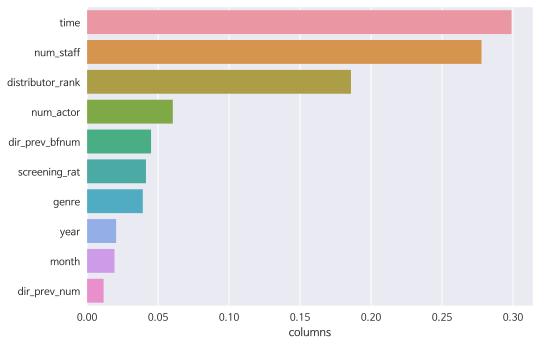

In [302]:
feature_importance = pd.DataFrame(rf_grid_clf.best_estimator_.feature_importances_, column, columns=["columns"]).sort_values(by='columns', ascending=False)


sns.barplot(data=feature_importance, x='columns' ,y=feature_importance.index)

In [49]:
# pred = np.mean(preds, axis=0)

# 제출

In [303]:
submission = pd.read_csv(path + "submission.csv")
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [304]:
submission['box_off_num'] = pred
submission.head()

,title,box_off_num
0,용서는 없다,2.247055e+06
1,아빠가 여자를 좋아해,1.380942e+06
2,하모니,1.580238e+06
3,의형제,1.661716e+06
4,평행 이론,1.277410e+06


In [305]:
sub_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/Dacon/movies/"
sub_name = "rf_submission5.csv"
submission.to_csv(sub_path + sub_name, index=False)